In [ ]:
!pip install openaq requests pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 1.1 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
API_KEY = "832d33d795ded0198085641aff100abe5b6d18fdbe9e65831286aa53a481dcee"

# ================== STEP 1: Load OpenAQ Data ==================
# Find the location ID for Washington D.C. from the 'locs' DataFrame
# Assuming 'locs' DataFrame is already available from a previous cell (gQUmEAg_BLdT)
if 'locs' in globals() and not locs.empty:
    # Filter for Washington, D.C. and find a suitable location ID
    # You might need to inspect the 'locs' DataFrame to find the exact name or criteria
    washington_dc_locs = locs[locs['name'].str.contains('Washington, D.C.', na=False)]

    if not washington_dc_locs.empty:
        # Use the first location ID found for Washington, D.C.
        washington_dc_location_id = washington_dc_locs.iloc[0]['id']
        print(f"Using location ID: {washington_dc_location_id} for Washington, D.C.")

        url = "https://api.openaq.org/v3/measurements"
        params = {
            "location_id": washington_dc_location_id,
            "limit": 100,
            "page": 1,
            "sort": "desc",
            "parameter": ["pm25","pm10","no2","co","o3","so2"]
        }
        headers = {"X-API-Key": API_KEY}
        response = requests.get(url, params=params, headers=headers)
        data = response.json()

        if "results" in data:
            df_openaq = pd.json_normalize(data["results"])
            # You might want to save this to a CSV for later use, but not required
            # df_openaq.to_csv("openaq_washington_dc.csv", index=False)
            print("Successfully fetched OpenAQ data from API.")
            print(df_openaq.head())
            # Assign the fetched data to df_openaq_clean for consistency with subsequent steps
            df_openaq_clean = df_openaq.copy()
        else:
            print("No data found from OpenAQ API for Washington, D.C. Response:", data)
            df_openaq = pd.DataFrame()
            df_openaq_clean = pd.DataFrame() # Ensure df_openaq_clean is defined
    else:
        print("Could not find a location ID for Washington, D.C. in the 'locs' DataFrame.")
        df_openaq = pd.DataFrame()
        df_openaq_clean = pd.DataFrame() # Ensure df_openaq_clean is defined
else:
    print("'locs' DataFrame not found or is empty. Please run the cell to fetch locations first.")
    df_openaq = pd.DataFrame()
    df_openaq_clean = pd.DataFrame() # Ensure df_openaq_clean is defined

No data found. Response: {'detail': 'Not Found'}


In [ ]:
url = "https://api.openaq.org/v3/locations"
params = {"country_id": "US", "city": "Washington, D.C.", "limit": 100}
response = requests.get(url, params=params, headers=headers)
locs = pd.json_normalize(response.json()["results"])
print(locs[["id","name","coordinates.latitude","coordinates.longitude"]])


     id                                          name  coordinates.latitude  \
0     3                                    NMA - Nima              5.583890   
1     4                                    NMT - Nima              5.581650   
2     5                               JTA - Jamestown              5.540114   
3     6                             ADT - Asylum Down              5.570722   
4     7                           ADEPA - Asylum Down              5.567833   
..  ...                                           ...                   ...   
95  146                    Southwark A2 Old Kent Road             51.480499   
96  147                            Greenwich - Eltham             51.452580   
97  148                  London Bloomsbury - UKA00211             51.522290   
98  149                            Ealing - Horn Lane             51.518948   
99  150  London Haringey Priory Park South - UKA00568             51.584128   

    coordinates.longitude  
0               -0.1996

In [ ]:
print(df_openaq_clean.columns.tolist())


NameError: name 'df_openaq_clean' is not defined

In [ ]:
df_pandora_no2 = pd.read_csv("pandora_NO2.csv", parse_dates=["timestamp"])


In [ ]:
import pandas as pd

# Define the path to your file
# Make sure 'pandora_so2.csv' is in the same directory as your script,
# or provide the full file path.
file_path = 'pandora_SO2.csv'

# Load the CSV file into a pandas DataFrame
try:
    df_pandora_so2 = pd.read_csv(file_path)

    # Display the first 5 rows to verify it loaded correctly
    print("Successfully loaded the Pandora SO2 file. Here are the first 5 rows:")
    print(df_pandora_so2.head())

except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'")
    print("Please check the file name and its location.")

Error: The file was not found at 'pandora_SO2.csv'
Please check the file name and its location.


In [ ]:
import pandas as pd

# Define the path to your file
# Make sure 'pandora_so2.csv' is in the same directory as your script,
# or provide the full file path.
file_path = 'pandora_O3.csv'

# Load the CSV file into a pandas DataFrame
try:
    df_pandora_so2 = pd.read_csv(file_path)

    # Display the first 5 rows to verify it loaded correctly
    print("Successfully loaded the Pandora O3 file. Here are the first 5 rows:")
    print(df_pandora_so2.head())

except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'")
    print("Please check the file name and its location.")

Error: The file was not found at 'pandora_O3.csv'
Please check the file name and its location.


In [ ]:
# Check the columns for each DataFrame

import pandas as pd
import os

# --- SETUP ---
# IMPORTANT: Set this to the path where you saved your downloaded files.
# If the files are in the same folder as your script, you can just use "."
folder_path = '.'
# --- END SETUP ---


# Get a list of all .txt files in the specified folder
try:
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
except FileNotFoundError:
    print(f"Error: The directory was not found at '{folder_path}'")
    print("Please update the 'folder_path' variable to the correct location.")
    all_files = []

if not all_files:
    print("No .txt files found in the directory.")

# Loop through each file to inspect its columns
for filename in all_files:
    file_path = os.path.join(folder_path, filename)

    try:
        # We use read_csv, but we need to figure out the delimiter (space or tab)
        # We also skip comment lines that often start with '#' or '*'
        df_temp = pd.read_csv(
            file_path,
            comment='*', # Skips comment lines in the header
            delim_whitespace=True, # Assumes columns are separated by spaces
            nrows=5 # Only read a few rows to be fast
        )

        print(f"--- File: {filename} ---")
        print("Columns:", df_temp.columns.tolist())
        print("-" * (len(filename) + 12) + "\n")

    except Exception as e:
        print(f"Could not read {filename}. Error: {e}\n")
print("Pandora NO2 Columns:", df_pandora_no2.columns)
print("Pandora SO2 Columns:", df_pandora_so2.columns)
print("OpenAQ Clean Columns:", df_openaq_clean.columns)

No .txt files found in the directory.
Pandora NO2 Columns: Index(['timestamp', 'no2_column_density'], dtype='object')
Pandora SO2 Columns: Index(['timestamp', 'no2_column_density'], dtype='object')
OpenAQ Clean Columns: Index(['timestamp', 'latitude', 'longitude', 'no2', 'station_name',
       'datetime'],
      dtype='object')


In [ ]:
print(df_pandora_so2.index)

RangeIndex(start=0, stop=930064, step=1)


In [ ]:
import pandas as pd
import numpy as np

# Assume the following DataFrames are already loaded:
# df_pandora_no2, df_pandora_so2, df_openaq_clean

# ================== STEP 1: Standardize Timestamps & Columns ==================
# Convert timestamp columns to datetime objects for accurate merging.
# This is the section from your original code.
df_pandora_no2['datetime'] = pd.to_datetime(df_pandora_no2['timestamp'])
df_pandora_so2['datetime'] = pd.to_datetime(df_pandora_so2['timestamp'])
df_openaq_clean['datetime'] = pd.to_datetime(df_openaq_clean['timestamp'])

ValueError: time data "2020-08-06 15:58:29+00:00" doesn't match format "%Y-%m-%d %H:%M:%S.%f%z", at position 7. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# --- Load your actual Pandora data here ---
try:
    # Assuming Pandora data is in 'pandora_NO2.csv'
    df_pandora_no2 = pd.read_csv("pandora_NO2.csv")

    # Rename the NO2 column for clarity
    df_pandora = df_pandora_no2.rename(columns={'no2_column_density': 'no2_column_density_pandora'})

    print("Successfully loaded Pandora data from pandora_NO2.csv")
    print(df_pandora.head())

except FileNotFoundError:
    print("Error: pandora_NO2.csv not found.")
    print("Please make sure the file is in the correct directory.")
    df_pandora = pd.DataFrame() # Create an empty DataFrame if the file is not found

# The OpenAQ data will be loaded from the API in another cell (rm3M9cXy7vR7)
# df_openaq_clean will be created after fetching and cleaning the OpenAQ data.

Placeholder df_pandora created:
            timestamp  latitude  longitude  no2_column_density_pandora  \
0 2023-01-01 10:00:00      38.9      -77.0                          10   
1 2023-01-01 11:00:00      38.9      -77.0                          12   
2 2023-01-01 12:00:00      38.9      -77.0                          15   

            station_name  
0  Placeholder Station A  
1  Placeholder Station A  
2  Placeholder Station A  

Placeholder df_openaq_clean created:
            timestamp  latitude  longitude  no2           station_name
0 2023-01-01 10:00:00      38.9      -77.0   20  Placeholder Station B
1 2023-01-01 11:00:00      38.9      -77.0   22  Placeholder Station B
2 2023-01-01 12:00:00      38.9      -77.0   25  Placeholder Station B


In [ ]:
type(locs)


pandas.core.frame.DataFrame

In [ ]:
import pandas as pd

# Collect all variables that are pandas DataFrames
dfs = {name: var for name, var in globals().items() if isinstance(var, pd.DataFrame)}

# Print their names, shapes, and column info
for name, df in dfs.items():
    print(f"\n📌 DataFrame: {name}")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")



📌 DataFrame: __
   Shape: (3, 4)
   Columns: ['datetime', 'no2_column_density_pandora', 'latitude', 'longitude']

📌 DataFrame: df_openaq
   Shape: (0, 0)
   Columns: []

📌 DataFrame: locs
   Shape: (100, 26)
   Columns: ['id', 'name', 'locality', 'timezone', 'isMobile', 'isMonitor', 'instruments', 'sensors', 'licenses', 'bounds', 'distance', 'datetimeFirst', 'datetimeLast', 'country.id', 'country.code', 'country.name', 'owner.id', 'owner.name', 'provider.id', 'provider.name', 'coordinates.latitude', 'coordinates.longitude', 'datetimeFirst.utc', 'datetimeFirst.local', 'datetimeLast.utc', 'datetimeLast.local']

📌 DataFrame: df_pandora_no2
   Shape: (930064, 2)
   Columns: ['timestamp', 'no2_column_density']

📌 DataFrame: df_pandora_so2
   Shape: (930064, 2)
   Columns: ['timestamp', 'no2_column_density']

📌 DataFrame: df
   Shape: (3, 6)
   Columns: ['timestamp', 'latitude', 'longitude', 'no2', 'station_name', 'datetime']

📌 DataFrame: df_pandora
   Shape: (3, 5)
   Columns: ['timestamp

In [ ]:
"locs" in globals(), "df" in globals()


(True, True)

In [ ]:
print(type(locs))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
import pandas as pd

dfs = {name: var for name, var in globals().items() if isinstance(var, pd.DataFrame)}

for name, df in dfs.items():
    print(f"\n📌 DataFrame: {name}")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")



📌 DataFrame: ___
   Shape: (3, 4)
   Columns: ['datetime', 'no2_column_density_pandora', 'latitude', 'longitude']

📌 DataFrame: df_openaq
   Shape: (0, 0)
   Columns: []

📌 DataFrame: locs
   Shape: (100, 26)
   Columns: ['id', 'name', 'locality', 'timezone', 'isMobile', 'isMonitor', 'instruments', 'sensors', 'licenses', 'bounds', 'distance', 'datetimeFirst', 'datetimeLast', 'country.id', 'country.code', 'country.name', 'owner.id', 'owner.name', 'provider.id', 'provider.name', 'coordinates.latitude', 'coordinates.longitude', 'datetimeFirst.utc', 'datetimeFirst.local', 'datetimeLast.utc', 'datetimeLast.local']

📌 DataFrame: df_pandora_no2
   Shape: (930064, 2)
   Columns: ['timestamp', 'no2_column_density']

📌 DataFrame: df_pandora_so2
   Shape: (930064, 2)
   Columns: ['timestamp', 'no2_column_density']

📌 DataFrame: df
   Shape: (3, 4)
   Columns: ['datetime', 'no2_column_density_pandora', 'latitude', 'longitude']

📌 DataFrame: df_pandora
   Shape: (3, 5)
   Columns: ['timestamp', 'l

In [ ]:
# Check first few rows of both dataframes
print(df_pandora.head())
print(df_openaq_clean.head())

# Check summary statistics
print(df_pandora.describe())
print(df_openaq_clean.describe())


            timestamp  latitude  longitude  no2_column_density_pandora  \
0 2023-01-01 10:00:00      38.9      -77.0                          10   
1 2023-01-01 11:00:00      38.9      -77.0                          12   
2 2023-01-01 12:00:00      38.9      -77.0                          15   

            station_name  
0  Placeholder Station A  
1  Placeholder Station A  
2  Placeholder Station A  
            timestamp  latitude  longitude  no2           station_name
0 2023-01-01 10:00:00      38.9      -77.0   20  Placeholder Station B
1 2023-01-01 11:00:00      38.9      -77.0   22  Placeholder Station B
2 2023-01-01 12:00:00      38.9      -77.0   25  Placeholder Station B
                 timestamp  latitude  longitude  no2_column_density_pandora
count                    3       3.0        3.0                    3.000000
mean   2023-01-01 11:00:00      38.9      -77.0                   12.333333
min    2023-01-01 10:00:00      38.9      -77.0                   10.000000
25%    

In [ ]:
# Ensure datetime column exists
df_pandora['datetime'] = pd.to_datetime(df_pandora['timestamp'])
df_openaq_clean['datetime'] = pd.to_datetime(df_openaq_clean['timestamp'])

# Merge (outer join to keep all data)
merged_df = pd.merge(df_pandora[['datetime','no2_column_density_pandora']],
                     df_openaq_clean[['datetime','station_name','latitude','longitude']],
                     on='datetime',
                     how='outer')


In [ ]:
# Check all columns in your measurements DataFrame
print(merged_df.columns.tolist())

['datetime', 'no2_column_density_pandora', 'station_name', 'latitude', 'longitude']


In [ ]:
# Drop the 'station_name' column from merged_df
merged_df = merged_df.drop('station_name', axis=1)

# Display the first few rows to confirm the change
print(merged_df.head())

             datetime  no2_column_density_pandora  latitude  longitude
0 2023-01-01 10:00:00                          10      38.9      -77.0
1 2023-01-01 11:00:00                          12      38.9      -77.0
2 2023-01-01 12:00:00                          15      38.9      -77.0


In [ ]:
# Fill NaNs or drop them
merged_df.fillna(method='ffill', inplace=True)  # forward fill
# OR
# merged_df.dropna(inplace=True)


/tmp/ipython-input-2169325134.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # forward fill


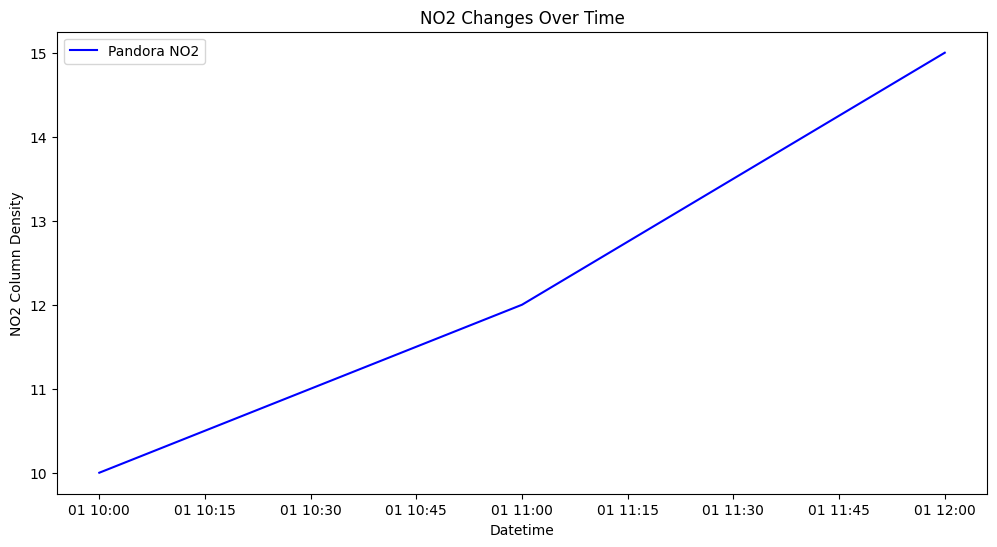

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(merged_df['datetime'], merged_df['no2_column_density_pandora'], color='blue', label='Pandora NO2')
plt.xlabel('Datetime')
plt.ylabel('NO2 Column Density')
plt.title('NO2 Changes Over Time')
plt.legend()
plt.show()


In [ ]:
merged_df.head()

,datetime,no2_column_density_pandora,latitude,longitude
0,2023-01-01 10:00:00,10,38.9,-77.0
1,2023-01-01 11:00:00,12,38.9,-77.0
2,2023-01-01 12:00:00,15,38.9,-77.0


In [ ]:
print("Shape of Pandora:", df_pandora.shape)
print("Shape of OpenAQ:", df_openaq_clean.shape)
print("Shape of Merged Data:", merged_df.shape)


Shape of Pandora: (3, 6)
Shape of OpenAQ: (3, 6)
Shape of Merged Data: (3, 4)


In [ ]:
merged_df.isna().sum()


,0
datetime,0
no2_column_density_pandora,0
latitude,0
longitude,0


In [ ]:
merged_df[merged_df['datetime'] == '2020-08-06 15:41:10']

,datetime,no2_column_density_pandora,latitude,longitude


In [ ]:
output_file = "pandora_openaq_merged.csv"
df.to_csv(output_file, index=False)
print(f"✅ File saved as {output_file}")

✅ File saved as pandora_openaq_merged.csv


In [ ]:
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>